Tommaso Peritore

In [49]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers.legacy import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt


seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

colors = ['#274001', '#828a00', '#f29f05', '#f25c05', '#d6568c', '#4d8584', '#a62f03', '#400d01', '#8a2f00', '#d6a05e']

## Creating Convolutional Neural Nets with Keras

We have so far considered each MNIST data sample as a $(28\times 28,)$-long 1d vector. On the other hand, we do know that in every one of the hand-written digits there are *local* spatial correlations between the pixels, but also *translational invariance*, which we would like to take advantage of to improve the accuracy of our classification model. To this end, we first need to reshape the training and test input data as follows

In [50]:
# IMPORT MNIST just like previous exercise
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)


# cast floats to single precision, and rescale to interval [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


# RESHAPE data, depending on Keras backend

if keras.backend.image_data_format() == 'channels_first':
   X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
   X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
   input_shape = (1, img_rows, img_cols)
else:
   X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
   X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
   input_shape = (img_rows, img_cols, 1)
    
#print('X_train shape:', X_train.shape)
#print('Y_train shape:', Y_train.shape)
#print()
#print(X_train.shape[0], 'train samples')
#print(X_test.shape[0], 'test samples')

One can ask the question of whether a neural net can learn to recognize such local patterns. This can be achieved by using convolutional layers.

# 12.2


Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **you should complete**:

Train your DCNN and evaluate its performance proceeding exactly as before.

In the end, **add the evaluation of your CNN performances** like that used for the DNN.

## Solution

### Features of a convolutional neural network
In this exercise we will try to improve upon the result of the previous exercise by upgrading our network to a Convolutional Neural Network (CNN). CNNs are a type of neural network that are particularly well suited for image recognition. Their particularity lies in the exploit of convolution operations to try and expose the relevant features of the input data.
<br> The convolution process involves the application of filters called `kernels` on subregions of the image to detect patterns, edges, textures and other significant visual information. 

CNNs are characterized by the presence of convolution layers followed by pooling layers, which progressively reduce the size of the image. Convolutional layers extract and combine local features, while pooling layers reduce the spatial size of the features while keeping the most relevant information. Subsequently, fully connected layers aggregate the extracted features and use them for classification or other processing tasks. This is exactly what we will be implemently shortly through the following layers:
- `Conv2D`: convolutional layer that applies a 2D convolution over an input image
- `MaxPooling2D`: pooling layer that downsamples the input representation by taking the maximum value over the window defined by the pool_size
- `Dropout`: regularization layer that randomly sets a fraction of input units to 0 at each update during training time, which helps prevent overfitting (seen in previous exercises)
- `Flatten`: layer that flattens the input, transforming it into a 1D array. From here the model can take a similar structure to the one we have seen in the previous exercises with `Dense` layers.



In [108]:
def create_CDNN():
   model = Sequential()
	# add layers 
   model.add(Conv2D(num_classes, 
                    kernel_size=(5, 5), 
                    strides=(1, 1),
                    activation='relu',
                    input_shape=input_shape))
   model.add(Conv2D(6, kernel_size = (5, 5), activation = 'relu'))
   model.add(MaxPooling2D(pool_size=(2, 2), 
                          strides=(2, 2)))
   model.add(Conv2D(16,
                    kernel_size=(5, 5), 
                    strides=(1, 1),
                    activation='relu'))
   model.add(MaxPooling2D(pool_size=(2, 2), 
                          strides=(2, 2)))
   model.add(Flatten())
   model.add(Dense(128, activation='relu'))
   model.add(Dropout(0.5))
   model.add(Dense(num_classes, activation='softmax'))
   
   # compile the model
   model.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer='Nadam',
                 metrics=['acc'])
   return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [109]:
batch_size = 32
epochs = 15

model_CDNN = create_CDNN()

history = model_CDNN.fit(X_train, Y_train,
                        batch_size = batch_size,
                        epochs = epochs,
                        verbose = 1,
                        validation_data = (X_test, Y_test)
                        )
print('Model trained successfully and ready to be evaluated.')

Epoch 1/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2807 - acc: 0.9129 - val_loss: 0.0657 - val_acc: 0.9786
Epoch 2/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1060 - acc: 0.9692 - val_loss: 0.0483 - val_acc: 0.9860
Epoch 3/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0792 - acc: 0.9764 - val_loss: 0.0476 - val_acc: 0.9858
Epoch 4/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0658 - acc: 0.9806 - val_loss: 0.0436 - val_acc: 0.9867
Epoch 5/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0574 - acc: 0.9828 - val_loss: 0.0481 - val_acc: 0.9851
Epoch 6/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0524 - acc: 0.9844 - val_loss: 0.0368 - val_acc: 0.9884
Epoch 7/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0456 - acc: 0.9865 - val_loss: 0.0295 - val_acc: 0.9902
Epoch 8/15
1875/1875 [==============================] -

### Evaluation
Now let's evaluate the performance of our CDNN and plot the results, together with some predictions.

313/313 [==============================] - 2s 5ms/step - loss: 0.0297 - acc: 0.9905

Test loss: 0.029655829071998596
Test accuracy: 0.9904999732971191



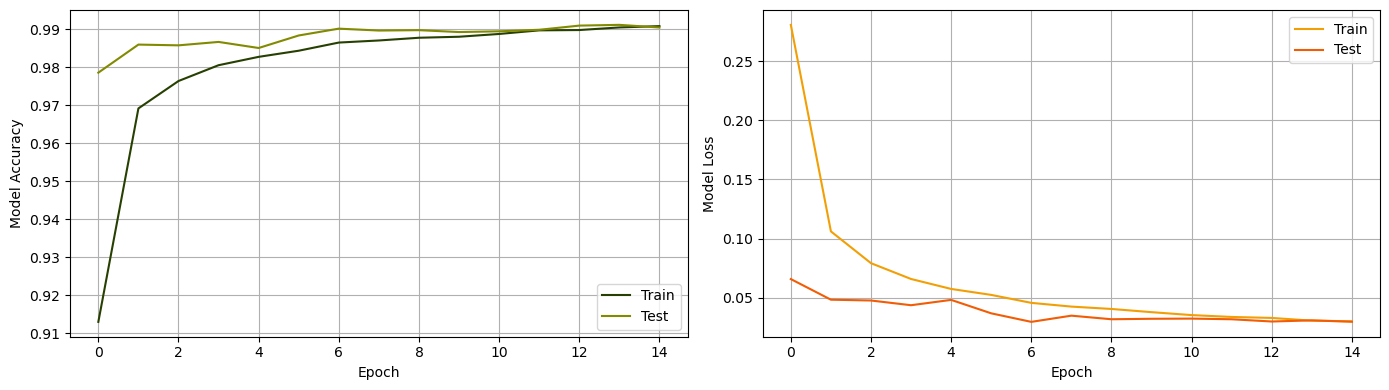

313/313 [==============================] - 2s 5ms/step


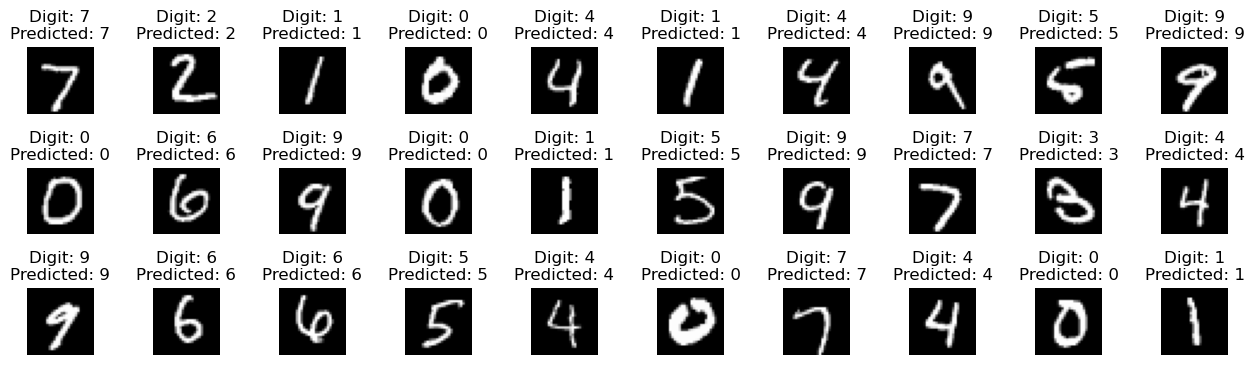

In [110]:
# Evaluate the model
score = model_CDNN.evaluate(X_test, Y_test, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

# look into training history
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
# Summarize history for accuracy
axs[0].plot(history.history['acc'], color=colors[0])
axs[0].plot(history.history['val_acc'], color=colors[1])
axs[0].set_ylabel('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='best')
axs[0].grid()
# Summarize history for loss
axs[1].plot(history.history['loss'], color=colors[2])
axs[1].plot(history.history['val_loss'], color=colors[3])
axs[1].set_ylabel('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='best')
axs[1].grid()

plt.tight_layout()
plt.show()

# Make predictions

predictions = model_CDNN.predict(X_test)

x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize = (16,4))

for i in range(30):    
    ax = plt.subplot(3, 10, i + 1)    
    plt.imshow(x_test[i, :, :, 0], cmap = 'gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off')
    plt.subplots_adjust(hspace = 0.8)
plt.show()

### Conclusions
Compared to the previous exercise, the loss and accuracy have certainly improved, especially when comparing with the same number of epochs. The goodness of the model is, however, guaranteed at the expense of a computational time per epoch that is significantly higher, of the order of $\sim 5$ times the training time of an epoch of exercise `12.1` (going from an average of 3s to 16s per epoch).

Once the network is trained and the parameters are fixed, we obtain after about $6$ epochs a test loss value of less than $0.7$ and an accuracy of about $98\%$. 
<br> Experiment a bit with the optimizers, brought me to chose to go with `nadam`, which for this model architecture allowed to obtain much better results compared to the same model with the `SGD` optimizer, especially in terms of loss. Furthermore, with `nadam` I was able to stop at $15$ epochs, because the results were already excellent, while with `SGD` I had to go beyond the 20th epoch to obtain still much worse results.

# 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits. (see Supplementary material in original exercise text for details on creating images).

## Solution

Using the `gimp` application I created 10 images of handwritten digits, which I then imported into the notebook. I then used the `predict` method of the model to predict the digit in the image. The results are shown below.

In [144]:
directory = "./Pictures"
data_list = []
data_values = []

# List all files in the directory
for filename in os.listdir(directory):
	# Construct the full file path
	file_path = os.path.join(directory, filename)
	
	# Open the image, convert to grayscale, and process it
	digit_in = Image.open(file_path).convert('L')
	img_rows, img_cols = digit_in.size
	# print(f"Image {filename} size: {img_rows}x{img_cols}")
	
	# Invert image
	pix = digit_in.load()
	data = np.zeros((img_rows, img_cols))
	for j in range(img_cols):
		for i in range(img_rows):
			data[i, j] = pix[j, i]
	
	data /= 255
	data_list.append(data)

	# Extract the digit from the filename and append to data_values
	digit = int(filename[0])
	data_values.append(digit)


size_data_list = len(data_list)
# print("Size of data_list:", size_data_list)

1/1 [==============================] - 0s 10ms/step


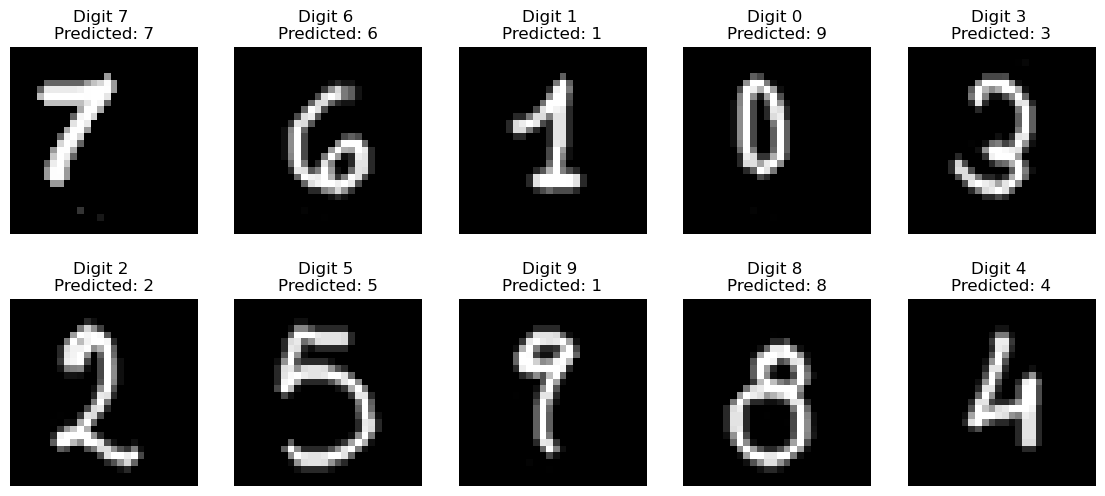

In [146]:
num_cols = 5
num_rows = int(np.ceil(len(data_list) / num_cols))

plt.figure(figsize=(14, 3*num_rows))

for i, data in enumerate(data_list):
   # Reshape data for prediction 
   data = data.reshape(1, img_rows, img_cols, 1)
   prediction = model_CDNN.predict(data)
   # Reshape data for plotting
   data = data.reshape(img_rows, img_cols)
   # Plot with prediction
   ax = plt.subplot(num_rows, num_cols, i + 1)
   plt.imshow(data, cmap='gray')
   plt.title(f"Digit {data_values[i]} \nPredicted: {np.argmax(prediction)}")
   plt.axis('off')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

### Conclusions
As we can see, the result are not bad at all. $8$ out of $10$ digits were correctly predicted, with the only mistakes being the digit $0$ and $9$ that were predicted as $9$ and $1$ respectively. It is interesting to try to make hypothesis on what led the model into failure for these two images. First off, they were clearly the worst images of the set. I specifically tried to not make the images all perfectly centered and well written to test more the model. The digit $9$ was drawn so that the circle on top was very small and the line was very thin, which could have led the model to think it was the tip of the $1$. The digit $0$ was written as an oval very tall but very small in width, which for some reason, which in this case I cannot explain, made the model think it was a $9$.

Overall though, the model performed very well on data similar to the one it was trained on, i.e. the MNIST dataset, and on my inputs, it performed acceptably well.